# 연속형 확률변수
- 취할 수 있는 값의 수가 무한대로 많은 변수를 의미합니다.
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.
- 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)
%precision 3
%matplotlib inline

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = '미적분관계1.jpg' STYLE='width 100px;'>
<img src = '미적분관계3.jpg' STYLE='width 100px;'>

/var/folders/v1/zh7hrj6j0h1gyhss4417qmqm0000gn/T/ipykernel_76768/574421191.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(x), 'b-', lw=1, c='k')
/var/folders/v1/zh7hrj6j0h1gyhss4417qmqm0000gn/T/ipykernel_76768/574421191.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw=1, c='b')


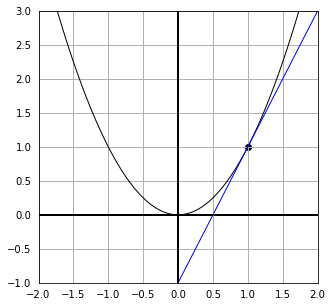

In [26]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

#### [과제]
미적분

## 1차원 연속형 확률변수
- 확률변수가 취할 수 있는 값은 구간[a,b]
- 확률은 확률밀도함수 또는 밀도함수에 의해 정의
- 어떤 특정 값을 취하는 확률로는 정의되지 않음.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.
    - 연속형 확률 변수에서 확률을 구할 때는 범위로 표현하여 구한다..
    - 경우의 수가 무한대인 연속 확률 변수의 분포를 설명하려면 특정한 값이 아닌 구간을 지정해 확률을 설명해야한다!

### 확률밀도함수(밀도함수)
- 특정 확률 변수 구간을 적분한 값으로 확률을 계산할 수 있는 함수

연속확률변수가 주어진 어떤구간 내에 포함될 확률입니다.

이를 함수형태로 나타낸 것이 확률밀도함수라고 합니다.

확률밀도 함수는 X축에는 확률변수의 값을 Y축에는 확률변수가 갖는 일정 구간 값이 나타날 확률을 표현한 곡선입니다.

확률밀도 함수는 구간을 정해서 넓이를 구하면 그 값이 확률이 됩니다.

즉, 확률밀도 함수에서 전체 넓이는 1을 의미합니다.

함수의 미분을 이용해 , 함수의 구간의 기울기를 계산합니다.

누적 밀도 함수를 미분한 함수를 확률 밀도 함수라고 합니다.

음의 무한대 ~ 무한대 적분하면 1이 나옵니다.

확률밀도함수는 0보다 같거나 크다.

In [33]:
# 취할 수 있는 값의 구간 정의
x_range = np.array([0,1])

In [88]:
# 밀도함수 정의
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [35]:
# 확률변수 정의
X = [x_range, f]

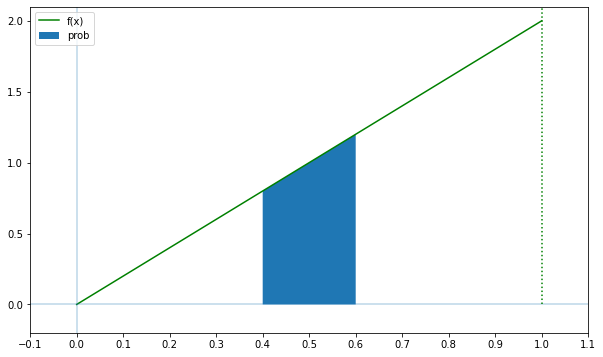

In [36]:
# 불공정한 룰렛에 대한 밀도함수와 확률
# 불공정한 룰렛 0.4-0.6 사이의 값을 취할 확률
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label = 'f(x)', color = 'green')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color = 'green')

# 0.4부터 0.6까지 x좌표 지정
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역에 색을 적용
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2,1.3,0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

확률밀도함수는 항상 0보다 커야한다. (마이너스는 없지만 0이 될 수는 있다. (확률이 0일 수는 있기 때문에))

In [37]:
# 첫번째 인수는 피적분함수, 두번째 인수와 세번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)
# 첫번째 반환값이 적분값이므로, 확률은 0.2이다.

(0.200, 0.000)

In [38]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [39]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

x축을 무한히 봤을 때 (기본0이상 범위에서의 확률) 적분값이 1= 모든 확률변수들이 취할 수 있는 값들의 총합이 1인 것과 같다.
(모든 나올 경우의 수를 합한 값 =1)

### 누적분포함수(분포함수)
- 확률 변수의 값이 특정 값보다 작거나 같을 확률을 나타내는 함수

누적되어 가는 확률 분포를 누적 확률 분포라고 합니다.

F(x) 기호를 사용하며, x는 범위의 끝을 뜻합니다.

F(10) : -무한대 ~ 10 구간 내 존재 확률

모든 경우의 합은 1이 됩니다.

F(-무한대) : 0

F(무한대) : 1

In [89]:
# 분포함수 정의
def F(x):
    return integrate.quad(f,-np.inf, x)[0]
# 마이너스 무한대부터 x까지

In [41]:
# 분포함수 확률 (룰렛 0.4 - 0.6값을 취할 확률)
F(0.6) - F(0.4)

0.200

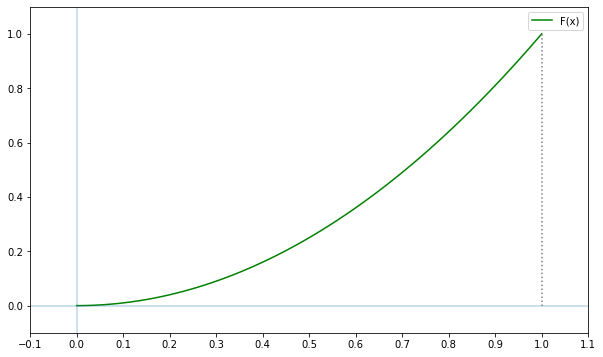

In [46]:
# 분포함수
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label = 'F(x)', color = 'green')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 확률변수의 변환

In [49]:
# y = 2X + 3
y_range = [3,5]

# 밀도함수
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y -3) / 2
    else:
        return 0
# 분포함수
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

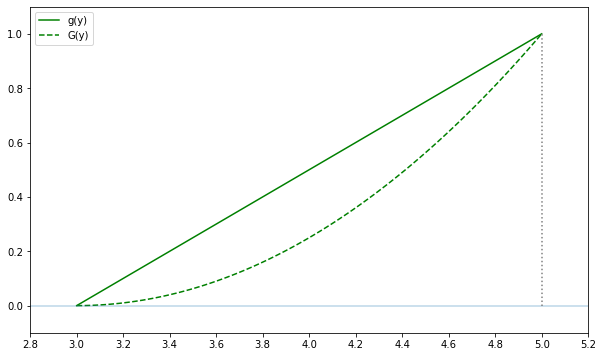

In [51]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label = 'g(y)', color='green')
ax.plot(ys, [G(y) for y in ys],
        label = 'G(y)', ls='--', color='green')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0,1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [52]:
# 정의역은 다르지만 확률변수 X의 밀도함수와 분포함수가 유사한 형태

### 확률변수의 지표

#### 기댓값

In [53]:
# 불공정한 룰렛의 기댓값
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [62]:
# 변환한 확률변수의 기댓값 정의
def E(X, g=lambda x:x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [58]:
# X의 기댓값 구하기
E(X)

0.667

In [59]:
# y = 2X + 3
E(X, g=lambda x: 2*x+3)

4.333

In [60]:
2 * E(X) + 3

4.333

#### 분산

In [66]:
# 불공정한 룰렛의 변수
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [69]:
# 변환한 확률변수 분산 정의
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [70]:
V(X)

0.056

In [71]:
# 확률변수 y = 2X + 3의 분산
V(X, lambda x: 2*x +3)

0.222

In [72]:
2**2 * V(X)

0.222

In [73]:
# V(2X+3)과 2**2V(X)가 동일하다는 것을 확인할 수 있다.

## 2차원 연속형 확률변수
- 두 개의 확률변수를 동시에 고려할 때 (X,Y)가 어떤 특성을 갖는지 알아보는 것

### 결합확률밀도함수
- 확률변수 X와 Y가 모두 연속형 확률변수인 경우,
    - 양의 함수여야한다.
    - 총 면적은 1
    - 2중 적분으로 구할 수 있음.

In [4]:
# 확률의 성질 확인
# X와 Y가 취할 수 있는 값을 정의
x_range = [0,2]
y_range = [0,1]

In [5]:
# 결합확률밀도함수 정의
def f_xy(x,y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x-y)
    else:
        return 0

In [6]:
# 리스트 XY
XY = [x_range, y_range, f_xy]

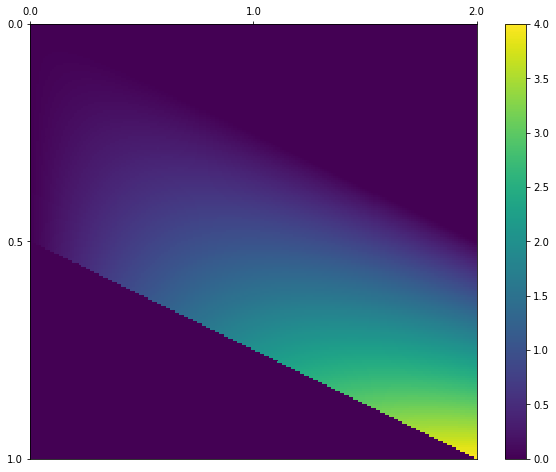

In [7]:
# 결합확률밀도함수 히트맵
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor = False)
ax.set_yticks(np.linspace(0,200,3), minor = False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [8]:
# 첫 번째 인수는 피적분함수, 두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy, [[-np.inf, np.inf], [-np.inf, np.inf]])[0]

1.000

### 주변확률밀도함수(주변밀도함수)
- 결합확률분포에서 어느 한 확률변수의 값에 대해 더해지거나 적분되어 얻어지는 분포

In [118]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [119]:
X = [x_range, f_X]
Y = [y_range, f_Y]

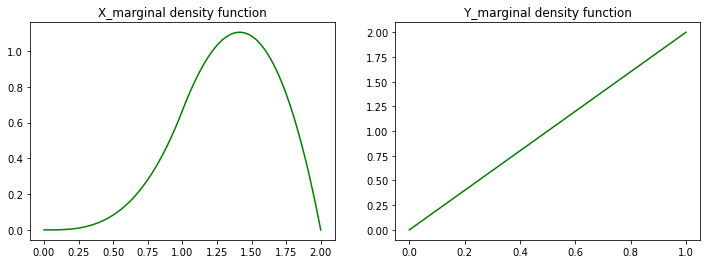

In [120]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='green')
ax2.plot(ys, [f_Y(y) for y in ys], color='green')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### 확률변수의 지표

#### 기댓값
- 결합확률분포에서 특정 확률변수 Y가 일어났을 때 특정 확률변수 X가 일어날 확률을 나타낸다.
- X의 기댓값이라면 x와 밀도함수의 곱을 x와 y로 적분하여 구할 수 있다.

In [121]:
def integrand(x,y):
    return x* f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf],[-np.inf,np.inf]])[0]

1.333

In [122]:
# X,Y의 함수 g(X,Y)의 기댓값 정의 - 일반화
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y) * f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf],[-np.inf,np.inf]])[0]

In [123]:
# X 기대값
mean_X = E(XY, lambda x,y : x)
mean_X

1.333

In [124]:
# Y 기대값
mean_Y = E(XY, lambda x,y : y)
mean_Y

0.667

In [125]:
# 선형성 성립 확인
# E(2X+3Y) = 2E(X) + 3E(Y)
a, b = 2, 3

In [126]:
E(XY, lambda x,y : a*x + b*y)

4.667

In [127]:
a * mean_X + b * mean_Y

4.667

#### 분산

In [128]:
def integrand(x,y):
    return (x - mean_X)**2 * f_xy(x,y)

integrate.nquad(integrand, [[-np.inf, np.inf],[-np.inf,np.inf]])[0]

0.111

In [129]:
# X,Y의 함수 g(X,Y)의 분산 정의 - 일반화
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x,y):
        return (g(x,y) - mean)**2 * f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf],[-np.inf,np.inf]])[0]

In [130]:
var_X = V(XY, lambda x,y:x)
var_X

0.111

In [131]:
var_Y = V(XY, lambda x,y:y)
var_Y

0.056

#### 공분산
- 두 확률변수가 서로 어느정도 연관되어 있는지 파악할 수 있게 해주는 분산

In [132]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X)*(y-mean_Y)*f_xy(x,y)
    
    return integrate.nquad(integrand, [[-np.inf, np.inf],[-np.inf, np.inf]])[0]

In [133]:
cov_xy = Cov(XY)
cov_xy

0.056

In [134]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [138]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

#### 상관계수
- 확률변수 X와 Y의 공분산을 표준화시킨 것이다.

In [136]:
cov_xy / np.sqrt(var_X * var_Y)

0.707

## 대표적인 연속형 확률분포

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

import warnings
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)
%precision 3
%matplotlib inline

In [52]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0] # 적분값과 추정 오차를 반환하는 함수(피적분함수, 적분 범위)

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):  # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='green')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='green')

    ax.legend()
    plt.show()

### 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포
- 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로, 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두 가지이다.
- $N(\mu,\sigma^2)$으로 표기
- 남자 고등학생의 키, 모의고사 점수

- 정규분포의 밀도함수
<img src = '정규분포.jpg' STYLE='width 200px;'>

- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요

In [53]:
# numpy를 사용해 구현
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [54]:
# N(2,0.5**2)을 따르는 확률변수 X
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [91]:
check_prob(X) # 기댓값은 2, 분산은 0.5**2

expected vaue 2.000
variance 0.250


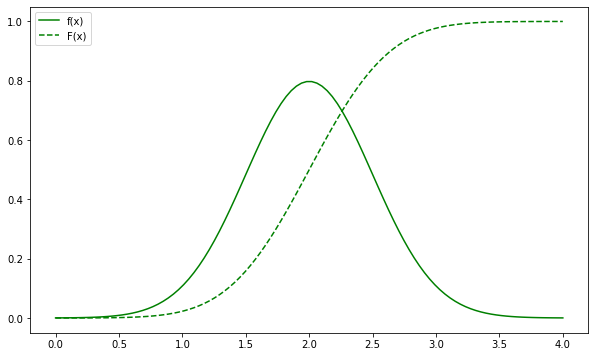

In [58]:
# 밀도함수와 분포함수를 0과 4사이의 구간에서 그려보기.
# 정규분포
plot_prob(X, 0, 4)

In [60]:
# 정규분포의 밀도함수는 좌우대칭인 종 모양이 되는 것이 특징이다.

#### scipy.stats
- norm함수 : 가우시안 정규분포 생성

In [71]:
# scipy.stats 사용하여 구현
rv = stats.norm(2,0.5) # 기댓값이 2이고 표준편차가 0.5인 정규분포 확률변수 생성

In [72]:
# 기댓값과 분산
rv.mean(), rv.var() # mean, var 메서드로 구할 수 있다.

(2.000, 0.250)

In [73]:
# 밀도함수
rv.pdf(2) # pdf 메서드로 계산할 수 있다.

0.798

In [74]:
# 분포함수
rv.cdf(1.7) # cdf 메서드로 계산할 수 있다.

0.274

In [76]:
# X가 1.7보다 작은 값이 되는 확률 P(X<=1.7) 구하기
rv.cdf(1.7)

0.274

In [84]:
# isf 메서드 사용 : 생존함수의 역함수(inverse survival function)
# 상위 30% 구하기
rv.isf(0.3)

2.262

In [85]:
# interval 메서드 사용 : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다.
# 90% 구간 구하기
rv.interval(0.9) 

(1.178, 2.822)

In [87]:
rv.isf(0.95), rv.isf(0.05) # 양쪽에 5%씩 남앙 있기 때문에

(1.178, 2.822)

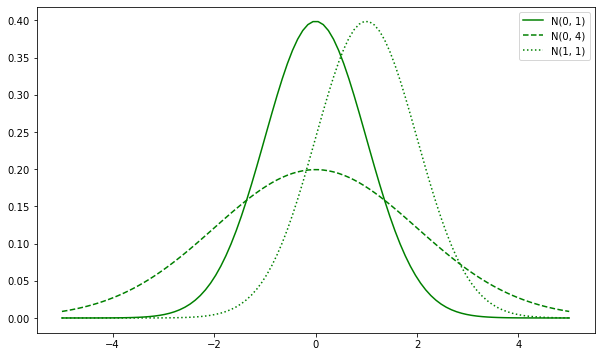

In [90]:
# 정규분포
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='green')
ax.legend()

plt.show()

In [140]:
stats.norm.pdf(loc=0, scale=1, x=0)

0.399

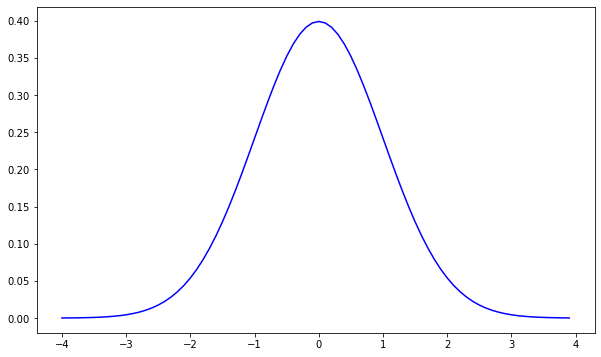

In [142]:
fig = plt.figure(figsize=(10, 6))
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1),color='blue')

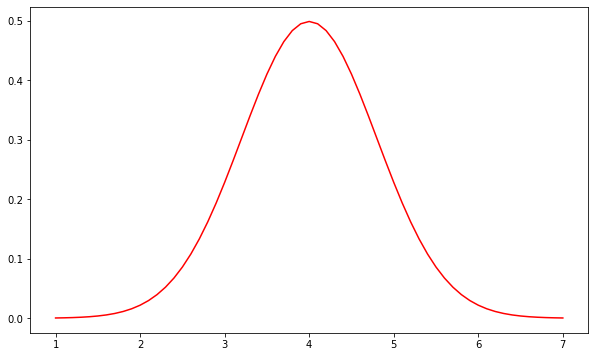

In [144]:
# x 1 ~ 7.1, 평균 4, 표준편차 0.8인 정규분포 곡선을 그려보기.
fig = plt.figure(figsize=(10, 6))
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8),color='red')

In [146]:
# 확률변수가 4일 때 확률밀도
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=4)

0.499

In [147]:
# 누적분포함수
stats.norm.cdf(loc=4, scale=0.8, x=7)

1.000

#### [과제]
- 상기 누적분포함수를 그래프로 출력하세요.
- 확률변수가 4일 때, 누적분포값(확률)
- 확률이 0.5일 때 확률변수를 구하세요.

확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

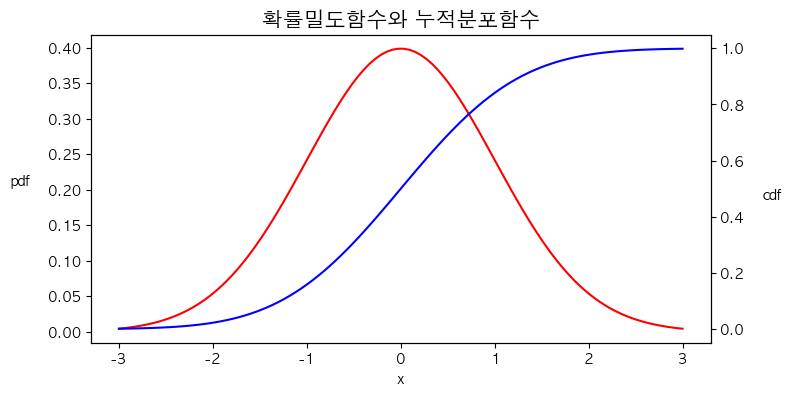

In [162]:
from matplotlib import rc
plt.style.use('default')
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=10)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=10,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=10,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
# ax1.legend(loc='center left')              # 범례 표시
# ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=15)

In [163]:
rv.cdf(0)

0.500

In [164]:
rv.cdf(1)

0.841

In [165]:
# ppf : 누적분포함수의 역함수. 누적분포가 0.5인 x값
rv.ppf(0.5)

0.000

In [166]:
rv.ppf(0.95)

1.645

In [ ]:
깢r#~1까지 

### 지수분포
- 어떤 사건이 발생하는 간격이 따르는 분포
- 간격이라는 시간이 따르는 분포로, 확률변수가 취할 수 있는 값은 0 이상의 실수이다.
- 지수분포의 파라미터는 $\lambda$로, 양의 실수이다.
- 파라미터가 $\lambda$인 지수분포를 $Ex$($\lambda$)로 표기